# 정기주_2023105757_과제3 : 확률밀도함수발생 프로그래밍!

## 필요한 라이브러리 설치 및 글꼴 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

## 1. 가우시안 랜덤변수 X를 10000개 생성

In [2]:
mean_int = 5 # 평균값 설정 ... 5
deviation_int = 3 # 표준편차 설정 ... 3

# 평균이 5, 표준편차가 3인 가우시안 랜덤변수 1만개 생성 (loc : 평균, scale : 표준편차, size : 개수)
random_variable = np.random.normal(loc = mean_int, scale = deviation_int, size = 10000)
print(random_variable)

[5.12988154 5.16861901 3.13133447 ... 5.40314533 7.61279571 5.61642618]


## 2. (1)의 결과를 그림으로 표현

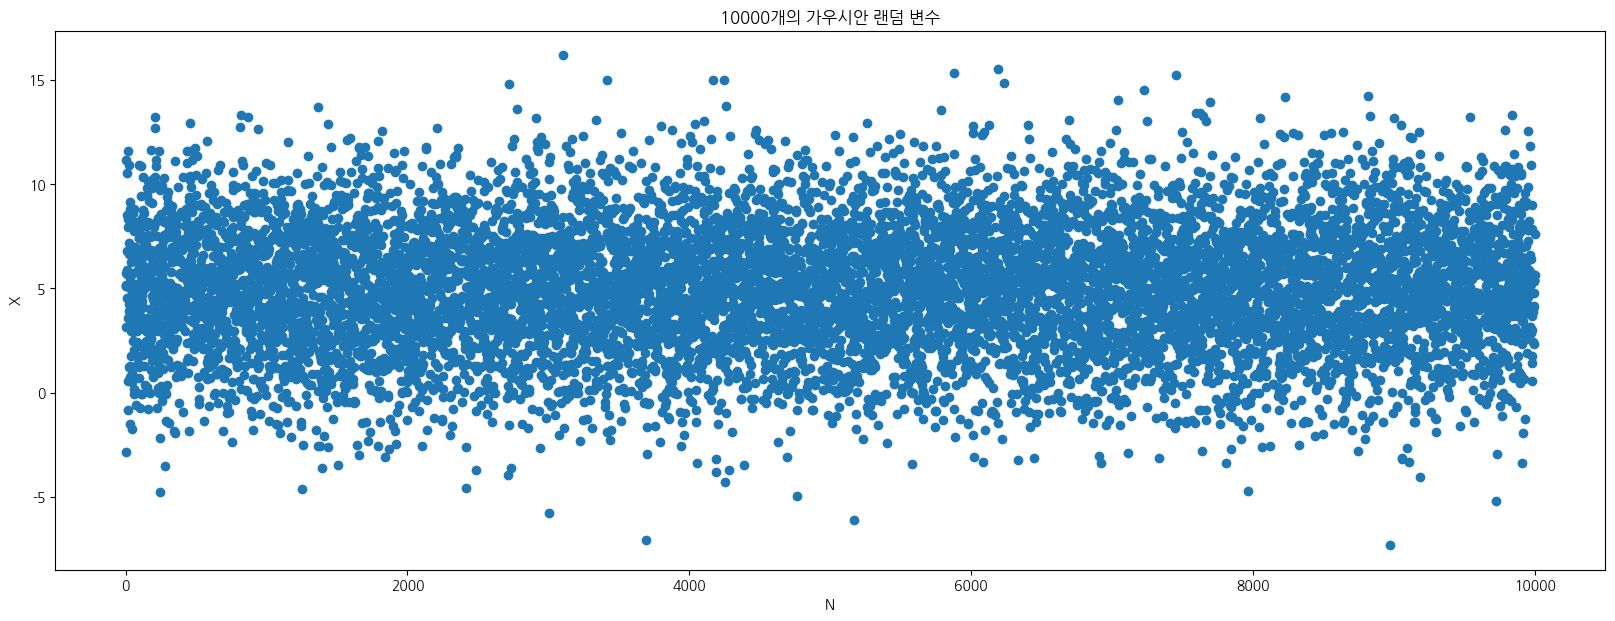

In [3]:
plt.figure(figsize=(20,7)) # 그래프 사이즈 설정
plt.scatter(list(range(0,10000)),random_variable) # 0 ~ 9999 (총 1만개) 인덱스의 random_variable에 있는 값을 산점도로 그림
plt.xlabel('N')
plt.ylabel('X')
plt.title('10000개의 가우시안 랜덤 변수')
plt.show()

## 3. (2)의 랜덤변수 X에 대한 히스토그램

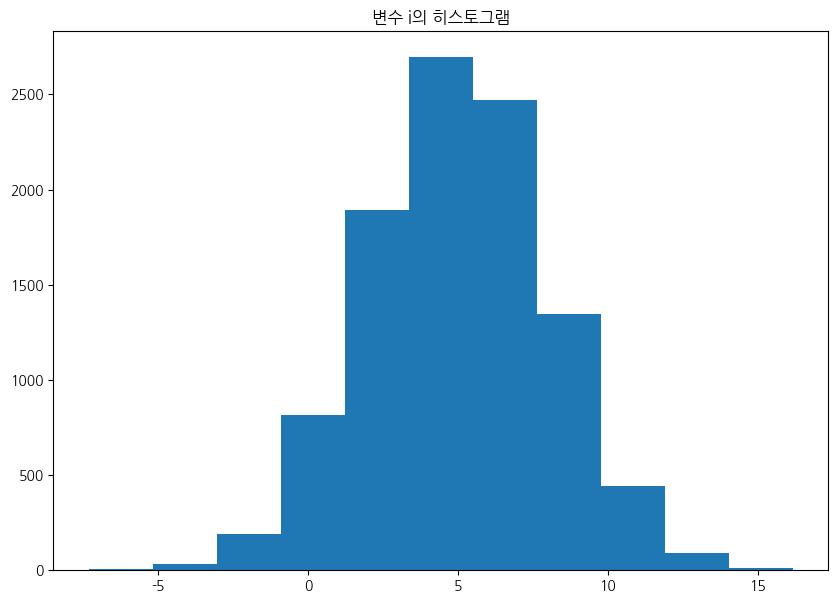

In [4]:
hist_valnum = mean_int + (2 * deviation_int)  # 히스토그램의 value 길이(평균 + 2표준편차(-+))

plt.figure(figsize=(10,7)) # 그래프 사이즈 설정
plt.hist(random_variable, bins=hist_valnum) # random_variable을 히스토그램으로 그림 ... 히스토그램의 value길이는 (평균 + 2표준편차)
plt.title('변수 i의 히스토그램')
plt.show()

## 4. (3)을 정규화하여 확률밀도함수를 만들고 그림으로 표시한다.

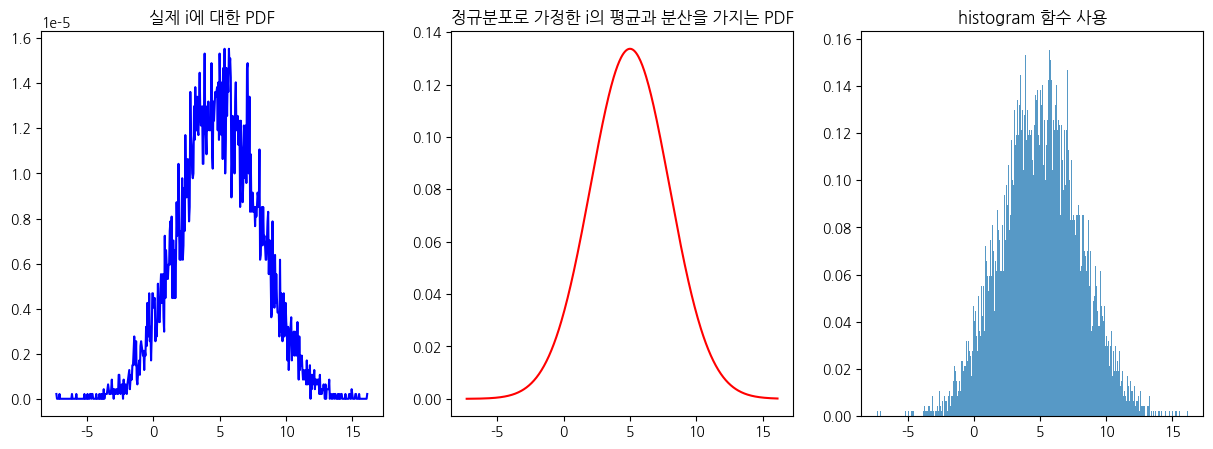

In [5]:
from scipy.stats import norm

y, x = np.histogram(random_variable, bins=500, density=True)

mean_random_variable = np.mean(random_variable)  # 평균값
var_random_variable = np.var(random_variable)  # 분포 값

P_gaussian = y / 10000
plt.figure(figsize=(15, 5))

# 실제 i에 대한 PDF
plt.subplot(1, 3, 1)
plt.plot(x[:-1], P_gaussian, 'blue')
plt.title('실제 i에 대한 PDF')

# 정규분포로 가정한 i의 평균과 분산을 가지는 PDF
plt.subplot(1, 3, 2)
plt.plot(x[:-1], norm.pdf(x[:-1], mean_random_variable, np.sqrt(var_random_variable)), 'red')
plt.title('정규분포로 가정한 i의 평균과 분산을 가지는 PDF')

# histogram 함수 사용
plt.subplot(1, 3, 3)
h = plt.hist(random_variable, bins=500, density=True, alpha=0.75)
plt.title('histogram 함수 사용')

plt.show()

## 5. P[2 ≤ x ≤ 8] 확률을 구한다.

In [6]:
# 1) count는 랜덤변수 10000개에서 2이상 8이하인 랜덤변수의 개수 ... 이를 10000으로 나눠주면 P[2 ≤ x ≤ 8]
count=[i>=2 and i<=8 for i in random_variable].count(True)

print("P[2 ≤ x ≤ 8] = ", count/10000) # P[2 ≤ x ≤ 8] = 0.6778

# 2) 평균이 5, 표준편차가 3인 가우시안 랜덤변수의 CDF를 만드는 메소드를 이용해 확률 구하기 ... P[2 ≤ x ≤ 8] = P[x ≤ 8] - P[x ≤ 2], Function.cdf(8) = P[x ≤ 8], Function.cdf(2) = P[x ≤ 2]
Function = norm(loc = 5, scale = 3)
print(Function.cdf(8) - Function.cdf(2))

#이 때, 1)에서 구한 값과 2)에서 구한 값에 차이가 있을 수 있다. ... 여기서는 약 0.0005정도의 오차가 있었다.

P[2 ≤ x ≤ 8] =  0.6832
0.6826894921370859


## 6. P[x ≤ -4.2] 확률을 구한다.

In [7]:
# 1) count는 랜덤변수 10000개에서 -4.2이하인 랜덤변수의 개수 ... 이를 10000으로 나눠주면 P[x ≤ -4.2]
count_2=[i<=-4.2 for i in random_variable].count(True)

print("P[x ≤ −4.2] = ", count_2/10000) # P[x ≤ -4.2] = 0.0011

# 2) 평균이 5, 표준편차가 3인 가우시안 랜덤변수의 CDF를 만드는 메소드를 이용해 확률 구하기 ... Function.cdf(-4.2) = P[x ≤ -4.2]
print(Function.cdf(-4.2))

#이 때, 1)에서 구한 값과 2)에서 구한 값에 차이가 있을 수 있다. ... 여기서는 약 0.00002정도의 오차가 있었다.

P[x ≤ −4.2] =  0.0011
0.0010823004813931916


## 7. Q(x) 함수를 이용하여 P[x≤−4.2] 확률을 구하고 (6)의 값과 비교하여라!

In [8]:
p = norm(loc = 5, scale = 3)
# 평균이 5, 표준편차가 3인 가우시안 랜덤변수의 CDF 를 만드는 메소드를 이용해 확률 구하기 ... 이전에 구한 확률과 다를 수 있다

Q = 1 - p.cdf(-4.2) # Q(x) = 1 − Φ(x) ... Q(-4.2) = 1 − Φ(-4.2) = 0.9989176995186068
PI_ = 1 - Q         # Φ(x) = 1 - Q(x) ... Φ(-4.2) = 1 - Q(-4.2) = 0.001082300481393239

print("P[x ≤ −4.2] = ", PI_) # Φ(-4.2) = P[x ≤ −4.2] = 0.001082300481393239
print("P[-4.2 ≤ x] = ", Q) # Q(-4.2) = P[-4.2 ≤ x] = 0.9989176995186068
print("확률의 총 합 : ", PI_ + Q) # Φ(-4.2) + Q(-4.2) = 1

# 6번에서 구한 값과 매우 비슷하다!

P[x ≤ −4.2] =  0.001082300481393239
P[-4.2 ≤ x] =  0.9989176995186068
확률의 총 합 :  1.0
